In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [52]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [53]:
df_train = pd.read_csv('archive\Corona_NLP_train.csv', encoding = 'latin')
df_test = pd.read_csv('archive\Corona_NLP_test.csv', encoding = 'latin')

In [54]:
df_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [55]:
df_train = df_train.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)
df_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [56]:
df_train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [57]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [58]:
df_test = df_test.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'],axis=1)
df_test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [59]:
def text_to_val (text):
    if text == 'Extremely Positive':
        return 1
    elif text == 'Positive':
        return 1
    elif text == 'Neutral':
        return 0
    elif text == 'Negative':
        return -1
    else:
        return -1

In [60]:
df_train['Category'] = df_train['Sentiment'].apply(text_to_val)
df_train

,OriginalTweet,Sentiment,Category
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,advice Talk to your neighbours family to excha...,Positive,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,1
3,My food stock is not the only one which is emp...,Positive,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,-1
...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,0
41153,Response to complaint not provided citing COVI...,Extremely Negative,-1
41154,You know itÂs getting tough when @KameronWild...,Positive,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0


In [61]:
df_test['Category'] = df_test['Sentiment'].apply(text_to_val)
df_test

,OriginalTweet,Sentiment,Category
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,-1
1,When I couldn't find hand sanitizer at Fred Me...,Positive,1
2,Find out how you can protect yourself and love...,Extremely Positive,1
3,#Panic buying hits #NewYork City as anxious sh...,Negative,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,0
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,1
3794,Did you panic buy a lot of non-perishable item...,Negative,-1
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,0
3796,Gov need to do somethings instead of biar je r...,Extremely Negative,-1


Text(0.5, 1.0, 'Distribution of sentiment in training data')

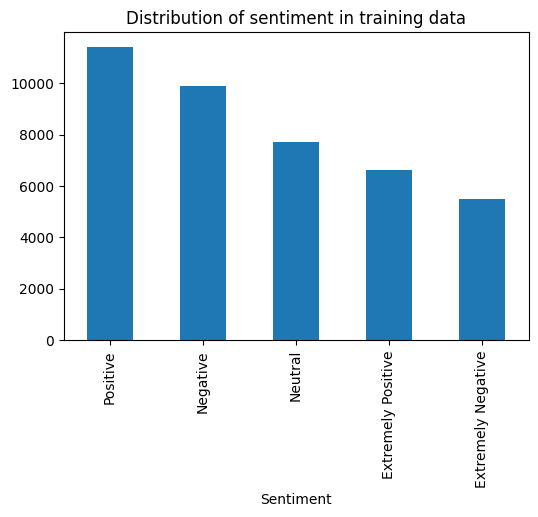

In [62]:
plt.figure(figsize = (6,4))
df_train.Sentiment.value_counts().plot(kind = 'bar')
plt.title('Distribution of sentiment in training data')

Text(0.5, 1.0, 'Distribution of sentiment in test data')

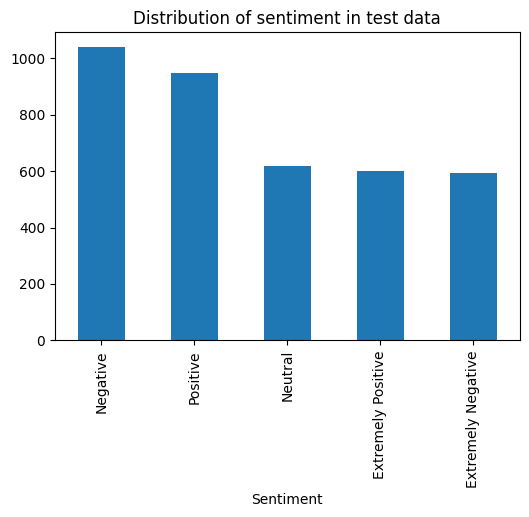

In [63]:
plt.figure(figsize = (6,4))
df_test.Sentiment.value_counts().plot(kind = 'bar')
plt.title('Distribution of sentiment in test data')

In [64]:
tweets = df_train['OriginalTweet'].tolist()
tweets

['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
 "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",
 "Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thin

In [65]:
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [66]:
tweets_processed = [preprocess(text) for text in tweets]
tweets_processed

['@MeNyrbie @Phil_Gahan @chrisitv https://t.co/iFz9FAn2 Pa https://t.co/xX6ghGFzCC https://t.co/I2NlzdxNo8',
 'advice talk neighbour family exchange phone number create contact list phone number neighbours schools employer chemist GP set online shopping account poss adequate supply regular med order',
 'Coronavirus Australia woolworth elderly disabled dedicated shopping hour amid COVID-19 outbreak https://t.co/binca9vp8p',
 'food stock \r\r\n\r\r\n panic food need \r\r\n stay calm stay safe \r\r\n\r\r\n covid19france COVID_19 covid19 coronaviru confinement Confinementotal ConfinementGeneral https://t.co/zrlg0z520j',
 'ready supermarket covid19 outbreak \r\r\n\r\r\n paranoid food stock litteraly coronavirus thing panic cause shortage \r\r\n\r\r\n coronavirusfrance restezchezvous stayathome confinement https://t.co/usmualq72n',
 'news regionâ\x92s confirm COVID-19 case come Sullivan County week people flock area store purchase cleaning supply hand sanitizer food toilet paper good @Tim_Do

In [67]:
df_train['Tweet_processed'] = tweets_processed
df_train

,OriginalTweet,Sentiment,Category,Tweet_processed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,@MeNyrbie @Phil_Gahan @chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia woolworth elderly disabl...
3,My food stock is not the only one which is emp...,Positive,1,food stock \r\r\n\r\r\n panic food need \r\r\n...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,-1,ready supermarket covid19 outbreak \r\r\n\r\r\...
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,0,airline pilot offer stock supermarket shelf NZ...
41153,Response to complaint not provided citing COVI...,Extremely Negative,-1,response complaint provide cite covid-19 relat...
41154,You know itÂs getting tough when @KameronWild...,Positive,1,know itâs get tough @KameronWilds ration to...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0,wrong smell hand sanitizer start turn \r\r\n\r...


In [68]:
model = Pipeline(
    [
        ('BoW',CountVectorizer()),
        ('Random_Forest',RandomForestClassifier(n_estimators=100,criterion='entropy'))
    ]
)

In [69]:
x = df_train['Tweet_processed']
y = df_train['Category']

In [70]:
x

0        @MeNyrbie @Phil_Gahan @chrisitv https://t.co/i...
1        advice talk neighbour family exchange phone nu...
2        Coronavirus Australia woolworth elderly disabl...
3        food stock \r\r\n\r\r\n panic food need \r\r\n...
4        ready supermarket covid19 outbreak \r\r\n\r\r\...
                               ...                        
41152    airline pilot offer stock supermarket shelf NZ...
41153    response complaint provide cite covid-19 relat...
41154    know itâs get tough @KameronWilds   ration to...
41155    wrong smell hand sanitizer start turn \r\r\n\r...
41156    @tartiicat new Rift S go $ 700.00 Amazon rn no...
Name: Tweet_processed, Length: 41157, dtype: object

In [71]:
y

0        0
1        1
2        1
3        1
4       -1
        ..
41152    0
41153   -1
41154    1
41155    0
41156   -1
Name: Category, Length: 41157, dtype: int64

In [72]:
model.fit(x,y)

Pipeline(steps=[('BoW', CountVectorizer()),
                ('Random_Forest', RandomForestClassifier(criterion='entropy'))])

In [73]:
tweets_test = df_test['OriginalTweet'].tolist()
tweets_test

['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
 "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
 'Find out how you can protect yourself and loved ones from #coronavirus. ?',
 '#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu',
 '#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One we

In [74]:
tweets_test_processed = [preprocess(text) for text in tweets_test]
tweets_test_processed

['trending New Yorkers encounter supermarket shelf picture Wegmans Brooklyn sell online grocer FoodKick MaxDelivery coronavirus fear shopper stock https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
 'find hand sanitizer Fred Meyer turn Amazon $ 114.97 2 pack purell??!!check   coronavirus concern drive price https://t.co/ygbipbflmy',
 'find protect love one coronavirus',
 'panic buying hit NewYork City anxious shopper stock food&amp;medical supply healthcare worker 30 BigApple 1st confirm coronavirus patient Bloomberg stage event \r\r\n\r\r\n https://t.co/IASiReGPC4 \r\r\n\r\r\n QAnon QAnon2018 qanon2020 \r\r\n election2020 CDC https://t.co/29iszoewxu',
 'toiletpaper dunnypaper coronaviru coronavirusaustralia coronavirusupdate Covid_19 9new   corvid19 7newsmelb dunnypapergate Costco     week buy baby milk powder buy toilet paper https://t.co/ScZryVvsIh',
 'remember time pay $ 2.99 gallon regular gas Los Angeles?Prices pump go look coronavirus impact price 4 pm @ABC7 https://t.co/Pyzq8YMu

In [75]:
df_test['Tweet_test_processed'] = tweets_test_processed
df_test

,OriginalTweet,Sentiment,Category,Tweet_test_processed
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,-1,trending New Yorkers encounter supermarket she...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,1,find hand sanitizer Fred Meyer turn Amazon $ 1...
2,Find out how you can protect yourself and love...,Extremely Positive,1,find protect love one coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,-1,panic buying hit NewYork City anxious shopper ...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,0,toiletpaper dunnypaper coronaviru coronavirusa...
...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,1,supermarket Israel People dance sing stay posi...
3794,Did you panic buy a lot of non-perishable item...,Negative,-1,panic buy lot non perishable item ECHO need fo...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,0,Asst Prof Economics @cconce @nbcphiladelphia t...
3796,Gov need to do somethings instead of biar je r...,Extremely Negative,-1,Gov need something instead biar je rakyat assu...


In [76]:
x_test = df_test['Tweet_test_processed']
y_test = df_test['Category']

In [77]:
print("Accuracy:",accuracy_score(y_test,model.predict(x_test)))

Accuracy: 0.7230121116377041
